1.1 ЗАГРУЗКА ДАННЫХ

Данные загружены. Представлен код по загрузке, отражено в отчете. Результаты очищены от технической информации, отражено в отчете.

1.2 ПРЕДОБРАБОТКА ДАННЫХ

Необходимо проанализировать значения атрибутов датасета, проанализировать значения, которыми заполнены признаки и обработать их при необходимости, отразить в отчете.

1.1 ЗАГРУЗКА ДАННЫХ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("adult.csv") # загрузка данных 

In [3]:
df.tail(25)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32537,37,Private,179137,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,39,United-States,<=50K
32538,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32539,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32540,30,Private,345898,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
32541,71,Self-emp-inc,287372,Doctorate,16,Married-civ-spouse,Priv-house-serv,Husband,White,Male,0,0,10,United-States,>50K
32542,45,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
32543,41,Private,202822,HS-grad,9,Separated,Other-service,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32544,72,Private,129912,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,25,United-States,<=50K
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K


Данные были загружены, код представлен

1.2 ПРЕДОБРАБОТКА ДАННЫХ

In [8]:
df.shape # размерность массива данных

(32561, 15)

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Имеем 6 признаков с типом данных int64, 9 признаков с типом данных object.

Полностью пустых столбцов нет, проверим количество пустых значений в остальных столбцах

In [11]:
df.isna().sum() # узнаем количество пустых значений в столбцах

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

В таблице отсутвуют пустые значение, поэтому переходим к обработке столбцов

In [12]:
df['workclass'].value_counts() # Рассмотрим столбец workclass

Private             23836
Self-emp-not-inc     2542
Local-gov            2098
State-gov            1298
Self-emp-inc         1166
Federal-gov           962
Never-worked          645
Without-pay            14
Name: workclass, dtype: int64

Поскольку значение 'Private' составляет бОльшую часть стобца и при этом равнозначно значению 'none', отбросим данный столбец

In [13]:
df.drop(["workclass"], axis = 1, inplace = True)

In [14]:
df['capital.loss'].value_counts() # Рассмотрим столбцы 'capital.loss' и 'capital.gain'

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

In [15]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

По аналогии со стобцом 'workclass' удалим 'capital.gain' и 'capital.loss', в них превалирует значение "0", равносильноe 'none'

In [16]:
df.drop(["capital.gain"], axis = 1, inplace = True)
df.drop(["capital.loss"], axis = 1, inplace = True)

Столбец 'education.num' представляет закодированный столбец 'education', в связи с этим, отбросим стобец 'education'

In [17]:
df.drop(["education"], axis = 1, inplace = True)

Перейдем к обработке столбца "income"

In [18]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

В нем всего два значения, заменим <=50K на 0 и >50K на 1 для дальнейшей обработки данных

In [19]:
df.loc[df['income'] == '<=50K', 'income'] = 0
df.loc[df['income'] == '>50K', 'income'] = 1

Столбец обработан, по аналогии обработаем столбцы 'race' и 'sex'

In [20]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [21]:
df.loc[df['race'] == 'White', 'race'] = 0
df.loc[df['race'] == 'Black', 'race'] = 1
df.loc[df['race'] == 'Asian-Pac-Islander', 'race'] = 2
df.loc[df['race'] == 'Amer-Indian-Eskimo', 'race'] = 3
df.loc[df['race'] == 'Other', 'race'] = 4

In [22]:
df['race'].value_counts() #Строчные значения заменены числовыми (закодированы)

0    27816
1     3124
2     1039
3      311
4      271
Name: race, dtype: int64

Столбец 'race' успешно предобработан!

In [23]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [24]:
df.loc[df['sex'] == 'Male', 'sex'] = 0
df.loc[df['sex'] == 'Female', 'sex'] = 1

Разберемся с оставшимися четырьмя столбцами закодировав их значения числами

In [25]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [26]:
df.loc[df['marital.status'] == 'Married-civ-spouse', 'marital.status'] = 0
df.loc[df['marital.status'] == 'Never-married', 'marital.status'] = 1
df.loc[df['marital.status'] == 'Divorced', 'marital.status'] = 2
df.loc[df['marital.status'] == 'Separated', 'marital.status'] = 3
df.loc[df['marital.status'] == 'Widowed', 'marital.status'] = 4
df.loc[df['marital.status'] == 'Married-spouse-absent', 'marital.status'] = 5
df.loc[df['marital.status'] == 'Married-AF-spouse', 'marital.status'] = 6

In [27]:
df['occupation'].value_counts()

Prof-specialty       4169
Exec-managerial      4163
Craft-repair         4134
Adm-clerical         3770
Sales                3650
Other-service        3614
Machine-op-inspct    2504
Handlers-cleaners    1851
Transport-moving     1597
Farming-fishing      1216
Tech-support          928
Protective-serv       655
Priv-house-serv       294
Armed-Forces           16
Name: occupation, dtype: int64

In [28]:
df.loc[df['occupation'] == 'Prof-specialty', 'occupation'] = 0
df.loc[df['occupation'] == 'Exec-managerial', 'occupation'] = 1
df.loc[df['occupation'] == 'Craft-repair', 'occupation'] = 2
df.loc[df['occupation'] == 'Adm-clerical', 'occupation'] = 3
df.loc[df['occupation'] == 'Sales', 'occupation'] = 4
df.loc[df['occupation'] == 'Other-service', 'occupation'] = 5
df.loc[df['occupation'] == 'Machine-op-inspct', 'occupation'] = 6
df.loc[df['occupation'] == 'Handlers-cleaners', 'occupation'] = 7
df.loc[df['occupation'] == 'Transport-moving', 'occupation'] = 8
df.loc[df['occupation'] == 'Farming-fishing', 'occupation'] = 9
df.loc[df['occupation'] == 'Tech-support', 'occupation'] = 10
df.loc[df['occupation'] == 'Protective-serv', 'occupation'] = 11
df.loc[df['occupation'] == 'Priv-house-serv', 'occupation'] = 12
df.loc[df['occupation'] == 'Armed-Forces', 'occupation'] = 13

In [29]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [30]:
df.loc[df['relationship'] == 'Husband', 'relationship'] = 0
df.loc[df['relationship'] == 'Not-in-family', 'relationship'] = 1
df.loc[df['relationship'] == 'Own-child', 'relationship'] = 2
df.loc[df['relationship'] == 'Unmarried', 'relationship'] = 3
df.loc[df['relationship'] == 'Wife', 'relationship'] = 4
df.loc[df['relationship'] == 'Other-relative', 'relationship'] = 5

In [31]:
df['native.country'].value_counts() #в столбце много разных значений 

United-States                 29225
Mexico                          651
Philippines                     210
Trinadad&Tobago                 179
Germany                         137
Puerto-Rico                     133
Taiwan                          122
Canada                          121
South                           117
Thailand                        117
El-Salvador                     106
India                           103
Cuba                             95
England                          90
Jamaica                          85
Italy                            81
China                            75
Poland                           72
Dominican-Republic               70
Japan                            68
Vietnam                          67
Guatemala                        64
Rare native.country              62
Columbia                         60
Portugal                         50
Iran                             46
Peru                             45
Haiti                       

Обработаем последний оставшийся столбец - 'fnlwgt'

In [32]:
df['fnlwgt'].value_counts()

123011    13
203488    13
164190    13
126675    12
121124    12
          ..
36376      1
78567      1
180407     1
210869     1
125489     1
Name: fnlwgt, Length: 21648, dtype: int64

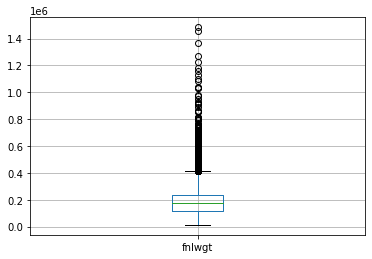

In [33]:
df.boxplot("fnlwgt") #проверим столбец на наличие "выбросов"

В столбце много отклонений от нормального распределения, избавимся от этих данных с помощью квантиля

In [34]:
quant = df["fnlwgt"].quantile(0.95)# считаем квантиль 95 % 
quant_low = df["fnlwgt"].quantile(0.05)# считаем квантиль 5 %

In [35]:
df_new = df[df["fnlwgt"] < quant] # убираем выбросы по квантилю
df_new = df_new[df_new["fnlwgt"] > quant_low] # убираем выбросы по квантилю

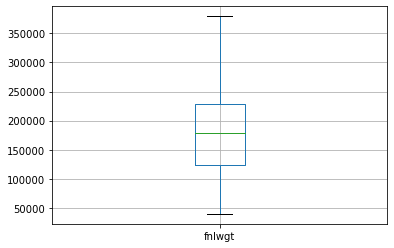

In [36]:
df_new.boxplot("fnlwgt") #выбросы успешно убраны

In [37]:
df_new[df_new["fnlwgt"] < quant]["fnlwgt"].max() # считаем максимум (НЕ ПОНИМАЮ ЗАЧЕМ)

379525

In [38]:
df_new

,age,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,77053,9,4,1,1,0,1,40,United-States,0
1,82,132870,9,4,1,1,0,1,18,United-States,0
2,66,186061,10,4,7,3,1,1,40,United-States,0
3,54,140359,4,2,6,3,0,1,40,United-States,0
4,41,264663,10,3,0,2,0,1,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,11,1,0,0,40,United-States,0
32557,27,257302,12,0,10,4,0,1,38,United-States,0
32558,40,154374,9,0,6,0,0,0,40,United-States,1
32559,58,151910,9,4,3,3,0,1,40,United-States,0


In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [44]:
df_new["native.country"] = le.fit_transform(df_new["native.country"].astype(str)) #кодируем столбец

In [47]:
df["native.country"].value_counts()

United-States                 29225
Mexico                          651
Philippines                     210
Trinadad&Tobago                 179
Germany                         137
Puerto-Rico                     133
Taiwan                          122
Canada                          121
South                           117
Thailand                        117
El-Salvador                     106
India                           103
Cuba                             95
England                          90
Jamaica                          85
Italy                            81
China                            75
Poland                           72
Dominican-Republic               70
Japan                            68
Vietnam                          67
Guatemala                        64
Rare native.country              62
Columbia                         60
Portugal                         50
Iran                             46
Peru                             45
Haiti                       

In [46]:
df_new["native.country"].value_counts()

35    26286
21      506
25      196
34      167
28      126
9       122
32      117
31      112
33      108
0       108
14      101
3        93
6        91
18       82
7        80
17       78
1        73
26       70
4        69
36       67
19       62
29       58
2        56
11       50
27       48
12       44
15       44
22       37
24       36
30       31
10       29
16       29
5        28
20       27
8        26
23       25
13       21
Name: native.country, dtype: int64

In [48]:
df_new #Дата-сет после полной предобработки

,age,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,77053,9,4,1,1,0,1,40,35,0
1,82,132870,9,4,1,1,0,1,18,35,0
2,66,186061,10,4,7,3,1,1,40,35,0
3,54,140359,4,2,6,3,0,1,40,35,0
4,41,264663,10,3,0,2,0,1,40,35,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,11,1,0,0,40,35,0
32557,27,257302,12,0,10,4,0,1,38,35,0
32558,40,154374,9,0,6,0,0,0,40,35,1
32559,58,151910,9,4,3,3,0,1,40,35,0
